<a href="https://colab.research.google.com/github/rammafitra/PyTorch_Model_DeepLearning_scratch/blob/main/CNN(simple)_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import datasets
path2data = "./data"
train_data=datasets.MNIST(path2data, train=True, download=True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
#2. Then, we will extract the input data and target labels:
x_train,y_train = train_data.data, train_data.targets
print(x_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [ ]:
#3. Next, we will load the MNIST test dataset:
val_data=datasets.MNIST(path2data, train=False, download=True)
x_val,y_val = val_data.data, val_data.targets
print(x_val.shape)
print(y_val.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


In [ ]:
#5. After that, we will add a new dimension to the tensors:
if len(x_train.shape) == 3:
  x_train = x_train.unsqueeze(1)
print(x_train.shape)

if len(x_val.shape) == 3:
  x_val = x_val.unsqueeze(1)
print(x_val.shape)


torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


torch.Size([3, 152, 242])


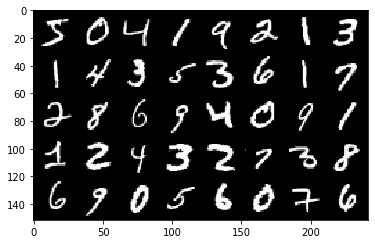

In [ ]:
#6. Next, we will import the required packages:
from torchvision import utils 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

#7. Then, we will define a helper function to display tensors as images:
def show(img):
  # convert tensor to numpy array
  npimg = img.numpy()
  # Convert to H*W*C shape
  npimg_tr=np.transpose(npimg, (1,2,0))
  plt.imshow(npimg_tr,interpolation='nearest')

#8. Next, we will create a grid of images and display them:
# make a grid of 40 images, 8 images per row
x_grid=utils.make_grid(x_train[:40], nrow=8, padding=2)
print(x_grid.shape)
# call helper function
show(x_grid)

#**Data Transformation**

Text(0.5, 1.0, 'transformed')

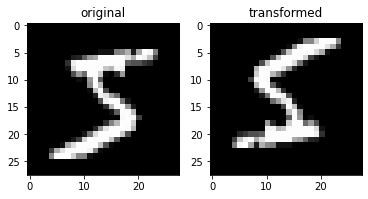

In [ ]:
#1. Let's define a transform class in order to apply some image transformations on the MNIST dataset:
from torchvision import transforms
# loading MNIST training dataset
train_data=datasets.MNIST(path2data, train=True, download=True)
# define transformations
data_transform = transforms.Compose([
  transforms.RandomHorizontalFlip(p=1),
  transforms.RandomVerticalFlip(p=1),
  transforms.ToTensor(),
  ])


#2. Let's apply the transformations on an image from the MNIST dataset:
# get a sample image from training dataset
img = train_data[0][0]
# transform sample image
img_tr=data_transform(img)
# convert tensor to numpy array
img_tr_np=img_tr.numpy()

# show original and transformed images
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0],cmap="gray");
plt.title("transformed")

In [ ]:
#3. We can also pass the transformer function to the dataset class:
# define transformations
data_transform = transforms.Compose([
  transforms.RandomHorizontalFlip(1),
  transforms.RandomVerticalFlip(1),
  transforms.ToTensor(),
  ])
# Loading MNIST training data with on-the-fly transformations
train_data=datasets.MNIST(path2data, train=True, download=True,
transform=data_transform )

#**Wrapping tensors into a dataset**

In [ ]:
#1. Let's create a PyTorch dataset by wrapping x_train and y_train :
from torch.utils.data import TensorDataset
# wrap tensors into a dataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)
for x,y in train_ds:
  print(x.shape,y.item())
  break

torch.Size([1, 28, 28]) 5


#**Creating data loaders**


In [ ]:
#1. Let's create two data loaders for the training and validation datasets:
from torch.utils.data import DataLoader
# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)
# iterate over batches
for xb,yb in train_dl:
  print(xb.shape)
  print(yb.shape)
  break

torch.Size([8, 1, 28, 28])
torch.Size([8])


#**Building Model**

In [ ]:
#1. First, we will implement the bulk of the class:
import torch.nn.functional as F
from torch import nn
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
  def forward(self, x):
    pass

def __init__(self):
  super(Net, self).__init__()
  self.conv1 = nn.Conv2d(1, 20, 5, 1)
  self.conv2 = nn.Conv2d(20, 50, 5, 1)
  self.fc1 = nn.Linear(4*4*50, 500)
  self.fc2 = nn.Linear(500, 10)

def forward(self, x):
  x = F.relu(self.conv1(x))
  x = F.max_pool2d(x, 2, 2)
  x = F.relu(self.conv2(x))
  x = F.max_pool2d(x, 2, 2)
  x = x.view(-1, 4*4*50)
  x = F.relu(self.fc1(x))
  x = self.fc2(x)
  return F.log_softmax(x, dim=1)

Net.__init__ = __init__
Net.forward = forward


model = Net()
print(model)


Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


#**Moving the model to a CUDA device**


In [ ]:
print(next(model.parameters()).device)

cpu


In [ ]:
import torch
device = torch.device("cuda:0")
model.to(device)

print(next(model.parameters()).device)

cuda:0


#**Printing The Model Summary**

In [ ]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 24, 24]             520
            Conv2d-2             [-1, 50, 8, 8]          25,050
            Linear-3                  [-1, 500]         400,500
            Linear-4                   [-1, 10]           5,010
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 1.64
Estimated Total Size (MB): 1.76
----------------------------------------------------------------


#**Defining the loss function and optimizer**

In [ ]:
#1. First, we will define the negative log-likelihood loss:
from torch import nn
loss_func = nn.NLLLoss(reduction="sum")
#2. Let's test the loss function on a mini-batch:
for xb, yb in train_dl:
  # move batch to cuda device
  xb=xb.type(torch.float).to(device)
  yb=yb.to(device)
  # get model output
  out=model(xb)
  # calculate loss value
  loss = loss_func(out, yb)
  print (loss.item())
  break
#3. Let's compute the gradients with respect to the model parameters:
# compute gradients
loss.backward()

100.05799102783203


In [ ]:
#1. Let's define the Adam optimizer:
from torch import optim
opt = optim.Adam(model.parameters(), lr=1e-4)
#2. Use the following code to update the model parameters:
# update model parameters
opt.step()
#3. Next, we set the gradients to zero:
# set gradients to zero
opt.zero_grad()

#**Training and evaluation**

In [ ]:
#1. Let's develop a helper function to compute the loss value per mini-batch:
def loss_batch(loss_func, xb, yb,yb_h, opt=None):
  # obtain loss
  loss = loss_func(yb_h, yb)
  # obtain performance metric
  metric_b = metrics_batch(yb,yb_h)
  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  return loss.item(), metric_b

#2. Next, we will define a helper function to compute the accuracy per mini-batch:
def metrics_batch(target, output):
  # obtain output class
  pred = output.argmax(dim=1, keepdim=True)
  # compare output class with target class
  corrects=pred.eq(target.view_as(pred)).sum().item()
  return corrects

#3. Next, we will define a helper function to compute the loss and metric values for a dataset:
def loss_epoch(model,loss_func,dataset_dl,opt=None):
  loss=0.0
  metric=0.0
  len_data=len(dataset_dl.dataset)
  for xb, yb in dataset_dl:
    xb=xb.type(torch.float).to(device)
    yb=yb.to(device)
    # obtain model output
    yb_h=model(xb)
    loss_b,metric_b=loss_batch(loss_func, xb, yb,yb_h, opt)
    loss+=loss_b
    if metric_b is not None:
      metric+=metric_b
  loss/=len_data
  metric/=len_data
  return loss, metric

#4. Finally, we will define the train_val function:
def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
  for epoch in range(epochs):
    model.train()
    train_loss,train_metric=loss_epoch(model,loss_func,train_dl,opt)
    model.eval()
    with torch.no_grad():
      val_loss, val_metric=loss_epoch(model,loss_func,val_dl)
    accuracy=100*val_metric
    print("epoch: %d, train loss: %.6f, val loss: %.6f,accuracy: %.2f" %(epoch, train_loss,val_loss,accuracy)) 

In [ ]:
#5. Let's train the model for a few epochs:
# call train_val function
num_epochs=5
train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch: 0, train loss: 0.148710, val loss: 0.135021,accuracy: 95.41
epoch: 1, train loss: 0.049541, val loss: 0.065996,accuracy: 98.00
epoch: 2, train loss: 0.028659, val loss: 0.055874,accuracy: 98.50
epoch: 3, train loss: 0.019541, val loss: 0.058262,accuracy: 98.65
epoch: 4, train loss: 0.015978, val loss: 0.060139,accuracy: 98.61


#**Storing and loading models**

In [44]:
!mkdir models

In [45]:
#1. First, we will store the model parameters or state_dict in a file:
# define path2weights

path2weights="./models/weights.pt"
# store state_dict to file
torch.save(model.state_dict(), path2weights)
#2. To load the model parameters from the file, we will define an object of the Net class:
# define model: weights are randomly initiated
_model = Net()
#3. Then, we will load state_dict from the file:
weights=torch.load(path2weights)
#4. Next, we will set state_dict to the model:
_model.load_state_dict(weights)



<All keys matched successfully>

#**Deploying The Model**

torch.Size([1, 28, 28])


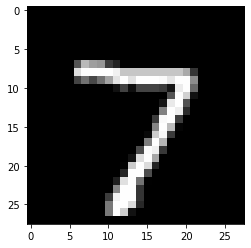

In [53]:
import matplotlib.pyplot as plt
n=0
x= x_val[n]
y=y_val[n]
print(x.shape)
plt.imshow(x.numpy()[0],cmap="gray")

In [54]:
#2. Then, we will preprocess the tensor:
# we use unsqueeze to expand dimensions to 1*C*H*W
x= x.unsqueeze(0)
# convert to torch.float32
x=x.type(torch.float)
# move to cuda device
x=x.to(device)

In [55]:
#3. Next, we will get the model prediction:
# get model output
if torch.cuda.is_available():
    _model.cuda()
output=_model(x)
# get predicted class
pred = output.argmax(dim=1, keepdim=True)
print(pred.item(),y.item())

7 7


In [60]:
!zip -r /content/models models

  adding: models/ (stored 0%)
  adding: models/weights.pt (deflated 7%)


In [61]:
from google.colab import files

files.download('/content/models.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>